In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
#import csv_file
csv_file='Resources/Crime_Data_LA_from_2010_to_Present.csv'

In [3]:
#convert csv to dataframe
crime_data_df=pd.read_csv(csv_file)
crime_data_df['year'] = pd.DatetimeIndex(crime_data_df['DATE OCC']).year
crime_data_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010


In [4]:
#filter data 2016, 2017, 2018
crime_data_df_2016_2017_2018= crime_data_df[(crime_data_df['year']>=2016) & (crime_data_df['year']<=2018)]
crime_data_df_2016_2017_2018['year'].value_counts()


2017    230333
2018    227754
2016    224835
Name: year, dtype: int64

In [27]:
crime_data_df_2016_2017_2018.to_csv("Resources/crime_data_2016_2017_2018_df.csv", index=False, header=True)

In [5]:
# shape of the data
crime_data_df_2016_2017_2018['year'].shape

(682922,)

In [6]:
crime_data_df_less2019= crime_data_df[crime_data_df['year']<=2018]

In [7]:
#combining similar offenses together
crime_data_df_less2019=crime_data_df_less2019.replace({'BATTERY - SIMPLE ASSAULT' : 'ASSAULT', 'BURGLARY FROM VEHICLE' : 'THEFT', 'VEHICLE - STOLEN' : 'THEFT', 'THEFT PLAIN - PETTY ($950 & UNDER)' : 'THEFT', 'BURGLARY' : 'THEFT', 'THEFT OF IDENTITY' : 'THEFT', 'INTIMATE PARTNER - SIMPLE ASSAULT' : 'ASSAULT', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' : 'VANDALISM', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' : 'ASSAULT', 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)' : 'VANDALISM', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)' : 'THEFT', 'ROBBERY' : 'THEFT', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD' : 'THEFT', 'CRIMINAL THREATS - NO WEAPON DISPLAYED' : 'CRIMINAL THREATS', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)' : 'THEFT', 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)' : 'THEFT', 'DOCUMENT FORGERY / STOLEN FELONY' : 'THEFT', 'TRESPASSING' : 'OTHER', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' : 'OTHER', 'OTHER MISCELLANEOUS CRIME' : 'OTHER', 'VIOLATION OF COURT ORDER' : 'OTHER', 'VIOLATION OF RESTRAINING ORDER' : 'OTHER', 'BRANDISH WEAPON' : 'OTHER', 'INTIMATE PARTNER - AGGRAVATED ASSAULT' : 'ASSAULT', 'THEFT, PERSON' : 'THEFT', 'BIKE - STOLEN' : 'THEFT', 'BURGLARY, ATTEMPTED' : 'THEFT', 'ATTEMPTED ROBBERY' : 'THEFT', 'BATTERY WITH SEXUAL CONTACT' : 'SEX CRIMES', 'RAPE, FORCIBLE' : 'SEX CRIMES', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT' : 'ASSAULT', 'BUNCO, GRAND THEFT' : 'THEFT', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)' : 'OTHER', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)' : 'THEFT', 'BUNCO, PETTY THEFT' : 'THEFT', 'CHILD NEGLECT (SEE 300 W.I.C.)' : 'OTHER', 'CHILD ANNOYING (17YRS & UNDER)' : 'OTHER', 'BATTERY POLICE (SIMPLE)' : 'OTHER', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)' : 'THEFT', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ' : 'SEX CRIMES', 'OTHER ASSAULT' : 'ASSAULT', 'CONTEMPT OF COURT' : 'OTHER', 'DISCHARGE FIREARMS/SHOTS FIRED' : 'OTHER', 'DISTURBING THE PEACE' : 'OTHER', 'ARSON' : 'OTHER', 'INDECENT EXPOSURE' : 'OTHER', 'VEHICLE - ATTEMPT STOLEN' : 'THEFT', 'RESISTING ARREST' : 'OTHER', 'THREATENING PHONE CALLS/LETTERS' : 'CRIMINAL THREATS', 'BURGLARY FROM VEHICLE, ATTEMPTED' : 'THEFT', 'CRIMINAL HOMICIDE' : 'OTHER', 'SEXUAL PENETRATION W/FOREIGN OBJECT' : 'SEX CRIMES', 'EXTORTION' : 'OTHER', 'SHOTS FIRED AT INHABITED DWELLING' : 'OTHER', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER' : 'THEFT', 'KIDNAPPING' : 'OTHER', 'STALKING' : 'OTHER', 'ORAL COPULATION' : 'OTHER', 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT' : 'ASSAULT', 'THEFT PLAIN - ATTEMPT' : 'THEFT', 'THROWING OBJECT AT MOVING VEHICLE' : 'VANDALISM', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER' : 'ASSAULT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH' : 'SEX CRIMES', 'UNAUTHORIZED COMPUTER ACCESS' : 'OTHER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER' : 'OTHER', 'LEWD CONDUCT' : 'OTHER', 'CRUELTY TO ANIMALS' : 'OTHER', 'THEFT FROM MOTOR VEHICLE - ATTEMPT' : 'THEFT', 'BOMB SCARE' : 'OTHER', 'PURSE SNATCHING' : 'THEFT', 'PEEPING TOM' : 'OTHER', 'CHILD STEALING' : 'OTHER', 'RAPE, ATTEMPTED' : 'SEX CRIMES', 'PICKPOCKET' : 'THEFT', 'FALSE IMPRISONMENT' : 'OTHER', 'PROWLER' : 'OTHER', 'COUNTERFEIT' : 'OTHER', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)' : 'OTHER', 'BUNCO, ATTEMPT' : 'OTHER', 'KIDNAPPING - GRAND ATTEMPT' : 'OTHER', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)' : 'THEFT', 'FAILURE TO YIELD' : 'OTHER', 'ILLEGAL DUMPING' : 'OTHER', 'DRIVING WITHOUT OWNER CONSENT (DWOC)' : 'OTHER', 'PIMPING' : 'SEX CRIMES', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS' : 'SEX CRIMES', 'FALSE POLICE REPORT' : 'OTHER', 'DOCUMENT WORTHLESS ($200.01 & OVER)' : 'OTHER', 'PANDERING' : 'OTHER', 'BATTERY ON A FIREFIGHTER' : 'OTHER', 'CREDIT CARDS, FRAUD USE ($950 & UNDER' : 'OTHER', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT' : 'OTHER', 'THEFT FROM PERSON - ATTEMPT' : 'THEFT', 'BOAT - STOLEN' : 'THEFT', 'RECKLESS DRIVING' : 'OTHER', 'SHOPLIFTING - ATTEMPT' : 'THEFT', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400' : 'THEFT', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)' : 'THEFT', 'LEWD/LASCIVIOUS ACTS WITH CHILD' : 'SEX CRIMES', 'CHILD PORNOGRAPHY' : 'SEX CRIMES', 'CONTRIBUTING' : 'OTHER', 'WEAPONS POSSESSION/BOMBING' : 'OTHER', 'DISHONEST EMPLOYEE - GRAND THEFT' : 'THEFT', 'DISHONEST EMPLOYEE - PETTY THEFT' : 'THEFT', 'CHILD ABANDONMENT' : 'OTHER', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE' : 'SEX CRIMES', 'TILL TAP - PETTY ($950 & UNDER)' : 'OTHER', 'GRAND THEFT / INSURANCE FRAUD' : 'THEFT', 'DOCUMENT WORTHLESS ($200 & UNDER)' : 'OTHER', 'VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS' : 'OTHER', 'CONSPIRACY' : 'OTHER', 'PURSE SNATCHING - ATTEMPT' : 'THEFT', 'DRUGS, TO A MINOR' : 'OTHER', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)' : 'THEFT', 'DISRUPT SCHOOL' : 'OTHER', 'LYNCHING' : 'OTHER', 'BIKE - ATTEMPTED STOLEN' : 'THEFT', 'TELEPHONE PROPERTY - DAMAGE' : 'VANDALISM', 'DRUNK ROLL' : 'OTHER', 'BRIBERY' : 'OTHER', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)' : 'OTHER', 'LYNCHING - ATTEMPTED' : 'OTHER', 'THEFT, COIN MACHINE - ATTEMPT' : 'THEFT', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM' : 'SEX CRIMES', 'PETTY THEFT - AUTO REPAIR' : 'THEFT', 'PICKPOCKET, ATTEMPT' : 'THEFT', 'TILL TAP - GRAND THEFT ($950.01 & OVER)' : 'THEFT', 'FAILURE TO DISPERSE' : 'OTHER', 'GRAND THEFT / AUTO REPAIR' : 'THEFT', 'INCITING A RIOT' : 'OTHER', 'BIGAMY' : 'OTHER', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)' : 'SEX CRIMES', 'DISHONEST EMPLOYEE ATTEMPTED THEFT' : 'THEFT', 'ABORTION/ILLEGAL' : 'OTHER', 'MANSLAUGHTER, NEGLIGENT' : 'OTHER', 'TILL TAP - ATTEMPT' : 'OTHER', 'BLOCKING DOOR INDUCTION CENTER' : 'OTHER', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)' : 'OTHER', 'TRAIN WRECKING' : 'OTHER', 'DRUNK ROLL - ATTEMPT' : 'OTHER', 'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)' : 'OTHER'})

In [8]:
#display clean crime data frame
crime_data_df_less2019.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,OTHER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,VANDALISM,...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,OTHER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,SEX CRIMES,...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010


In [10]:
pd.options.display.max_rows = 500

In [11]:
assignee_group=crime_data_df_less2019.groupby('Crm Cd Desc')
total_count=assignee_group['Crm Cd Desc'].count()
#total number of crimes
summary = pd.DataFrame({'Total counts':total_count})
summary.head()

,Total counts
Crm Cd Desc,
ASSAULT,382666
CRIMINAL THREATS,54533
OTHER,174459
SEX CRIMES,29409
THEFT,1074002


In [12]:
assault_group=crime_data_df_less2019[crime_data_df_less2019['Crm Cd Desc']=='ASSAULT'].groupby(['year'])
theft_group=crime_data_df_less2019[crime_data_df_less2019['Crm Cd Desc']=='THEFT'].groupby(['year'])
criminal_group=crime_data_df_less2019[crime_data_df_less2019['Crm Cd Desc']=='CRIMINAL THREATS'].groupby(['year'])

assault_count_year=assault_group['DR_NO'].count()
theft_count_year=theft_group['DR_NO'].count()
criminal_count_year=criminal_group['DR_NO'].count()

st=pd.DataFrame({'Assault count':assault_count_year,
                'Theft count':theft_count_year,
                'Criminal count':criminal_count_year})
# (st.style.format({'Theft count': '{:,}',
#                   "Total Revenue":'{:,}',
#                 'Criminal count':'{:,}'}))
st.head(9).style.format("{:,.0f}")


,Assault count,Theft count,Criminal count
year,,,
2010,"41,136","117,461","7,070"
2011,"39,475","113,349","6,822"
2012,"39,271","115,033","6,531"
2013,"37,381","111,268","5,904"
2014,"40,679","108,944","6,057"
2015,"44,279","122,414","5,586"
2016,"45,311","128,263","5,532"
2017,"47,383","130,087","5,479"
2018,"47,751","127,183","5,552"


In [13]:
st.reset_index(inplace=True)
st.head().style.format("{:,.0f}")

,year,Assault count,Theft count,Criminal count
0,"2,010","41,136","117,461","7,070"
1,"2,011","39,475","113,349","6,822"
2,"2,012","39,271","115,033","6,531"
3,"2,013","37,381","111,268","5,904"
4,"2,014","40,679","108,944","6,057"


<IPython.core.display.Javascript object>


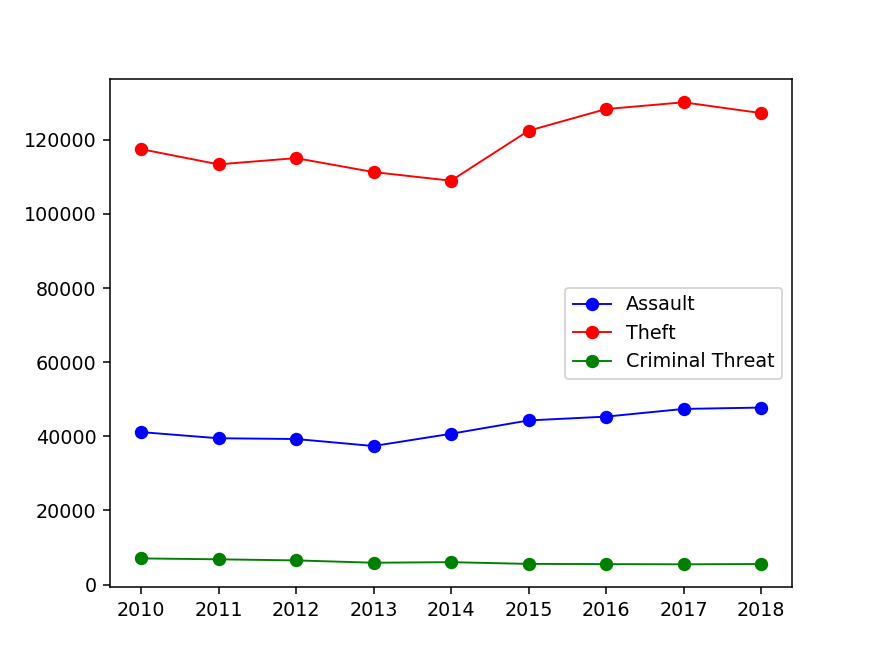

In [18]:
assaultplot, =plt.plot(st['year'],st['Assault count'],linewidth=1,marker="o",color='blue', label='Assault')
theftplot, =plt.plot(st['year'],st['Theft count'],linewidth=1,marker="o",color='red', label='Theft')
criminalplot, =plt.plot(st['year'],st['Criminal count'],linewidth=1,marker="o",color='green', label='Criminal Threat')


In [19]:
plt.legend(handles=[assaultplot,theftplot,criminalplot], loc="best")